In [1]:
veriler = [
  {
    "m2": 150,
    "denize_index": 50,
    "fiyat": 150
  },
  {
    "m2": 150,
    "denize_index": 70,
    "fiyat": 300
  },
  {
    "m2": 120,
    "denize_index": 95,
    "fiyat": 280
  },
  {
    "m2": 250,
    "denize_index": 10,
    "fiyat": 200
  }
]

In [2]:
veriler

[{'m2': 150, 'denize_index': 50, 'fiyat': 150},
 {'m2': 150, 'denize_index': 70, 'fiyat': 300},
 {'m2': 120, 'denize_index': 95, 'fiyat': 280},
 {'m2': 250, 'denize_index': 10, 'fiyat': 200}]

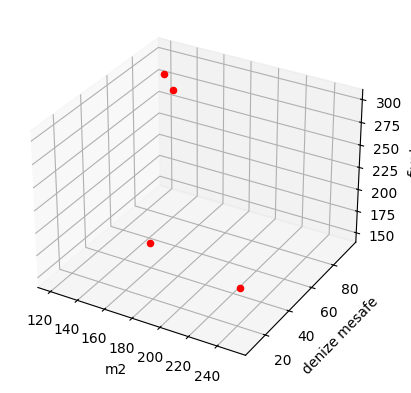

In [3]:
# draw 3d plot for veriler

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for veri in veriler:
  ax.scatter(veri["m2"], veri["denize_index"], veri["fiyat"], c='r', marker='o')

ax.set_xlabel('m2')
ax.set_ylabel('denize mesafe')
ax.set_zlabel('fiyat')

plt.show()


In [29]:
w1 = 10.3
w2 = 0.5
b = 0.1

def reset_weights():
  global w1, w2, b
  w1 = 10.3
  w2 = 0.5
  b = 0.1

In [30]:
def tahmin_et(m2, denize_index):
  return m2 * w1 + denize_index * w2 + b

In [31]:
# test all veriler
for veri in veriler:
  tahmin = tahmin_et(veri["m2"], veri["denize_index"])
  print("M2: {}, Denize Index: {}, Tahmin: {}, Gerçek: {}, Fark: {}".format(veri["m2"], veri["denize_index"], tahmin, veri["fiyat"], veri["fiyat"] - tahmin))

M2: 150, Denize Index: 50, Tahmin: 1570.1, Gerçek: 150, Fark: -1420.1
M2: 150, Denize Index: 70, Tahmin: 1580.1, Gerçek: 300, Fark: -1280.1
M2: 120, Denize Index: 95, Tahmin: 1283.6, Gerçek: 280, Fark: -1003.5999999999999
M2: 250, Denize Index: 10, Tahmin: 2580.1, Gerçek: 200, Fark: -2380.1


In [32]:
def hata_hesapla(gercek, tahmin):
  return gercek - tahmin

In [33]:
test = veriler[0]
tahmin = tahmin_et(test["m2"], test["denize_index"])
hata = hata_hesapla(test["fiyat"], tahmin)

print("Hata: ", hata, "Tahmin: ", tahmin)

Hata:  -1420.1 Tahmin:  1570.1


In [34]:
lr = 0.0003

In [35]:
dw1 = hata * test["m2"] / (test["m2"] + test["denize_index"]) * lr
dw2 = hata * test["denize_index"] / (test["m2"] + test["denize_index"]) * lr
db = hata * lr
w1 = w1 + dw1
w2 = w2 + dw2
b = b + db
print("dw1: ", dw1, "dw2: ", dw2, "db: ", db, "w1: ", w1, "w2: ", w2, "b: ", b)

dw1:  -0.3195225 dw2:  -0.10650749999999998 db:  -0.4260299999999999 w1:  9.980477500000001 w2:  0.3934925 b:  -0.32602999999999993


In [91]:
reset_weights()

In [60]:
def hata_ortalama_hesapla(veriler):
  toplam_hata = 0
  for veri in veriler:
    tahmin = tahmin_et(veri["m2"], veri["denize_index"])
    hata = hata_hesapla(veri["fiyat"], tahmin)
    toplam_hata += hata
  return toplam_hata / len(veriler)

In [92]:
# -0.8634055434361514
# -0.8638536224730231

hata_ortalama_hesapla(veriler)


-1520.975

In [90]:
number_of_iterations = 100
for i in range(number_of_iterations):
  for veri in veriler:
    tahmin = tahmin_et(veri["m2"], veri["denize_index"])
    hata = hata_hesapla(veri["fiyat"], tahmin)
    dw1 = hata * veri["m2"] / (veri["m2"] + veri["denize_index"]) * lr
    dw2 = hata * veri["denize_index"] / (veri["m2"] + veri["denize_index"]) * lr
    db = hata * lr
    w1 = w1 + dw1
    w2 = w2 + dw2
    b = b + db
    print("dw1: ", dw1, "dw2: ", dw2, "db: ", db, "w1: ", w1, "w2: ", w2, "b: ", b)

dw1:  -0.034432465160297174 dw2:  -0.011477488386765723 db:  -0.04590995354706289 w1:  2.476064890624431 w2:  -1.2928877282550857 b:  -9.516822837630654
dw1:  0.005851887999918131 dw2:  0.0027308810666284607 db:  0.008582769066546592 w1:  2.4819167786243495 w2:  -1.2901568471884572 b:  -9.508240068564108
dw1:  0.019129081749747177 dw2:  0.015143856385216517 db:  0.03427293813496369 w1:  2.501045860374097 w2:  -1.2750129908032408 b:  -9.473967130429145
dw1:  -0.11626077924665269 dw2:  -0.004650431169866107 db:  -0.12091121041651878 w1:  2.3847850811274443 w2:  -1.279663421973107 b:  -9.594878340845664
